`ftol` termination condition is satisfied.
Function evaluations 7, initial cost 4.2382e+00, final cost 3.0575e-02, first-order optimality 3.30e-07.
Оценки параметров: a1=-2.0456, a2=-2.0076, c1=2.0447, c2=0.9875


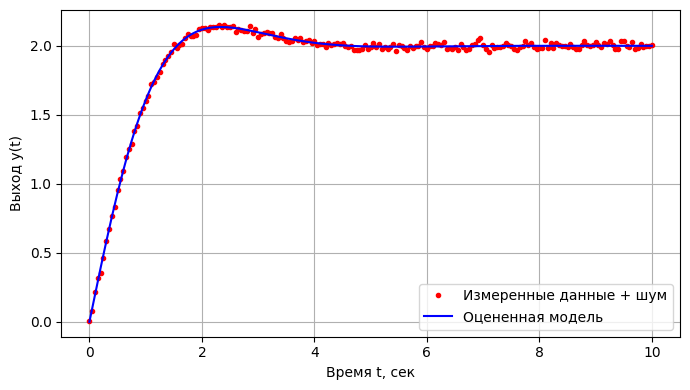

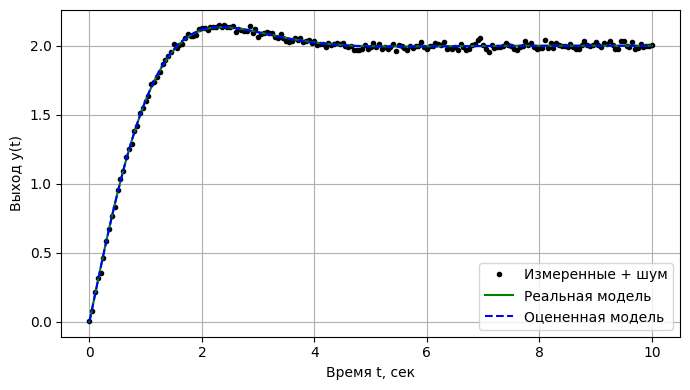

In [3]:
import numpy as np
from scipy import integrate, optimize
import matplotlib.pyplot as plt

# Фиксация генератора случайных чисел
rng = np.random.default_rng(seed=42)

# Реальные коэффициенты
a1_real = -2.0
a2_real = -2.0
c1_real = 2.0
c2_real = 1.0

p_real = np.array([a1_real, a2_real, c1_real, c2_real])

# Правая часть системы
def ode(x, t, p):
    # x = [x1, x2], p = [a1, a2, c1, c2]
    a1, a2, _, _ = p
    u = 1.0  # единичное воздействие
    du_dt = 0.0  # производная единичного воздействия
    x1, x2 = x
    dx1 = x2
    dx2 = a1 * x1 + a2 * x2 + du_dt + 2 * u
    return [dx1, dx2]

# Временная сетка
t_exp = np.linspace(0, 10, 201)
x0 = [0.0, 0.0]  # начальные условия

# Решение системы
sol_exp = integrate.odeint(ode, x0, t_exp, args=(p_real,))
y_exp = p_real[2]*sol_exp[:,0] + p_real[3]*sol_exp[:,1]
y_exp_noise = y_exp + rng.normal(scale=0.02, size=y_exp.shape)  # добавляем шум

# Функции для тестирования модели
def test(p, t_grid, x0):
    sol = integrate.odeint(ode, x0, t_grid, args=(p,))
    x1 = sol[:, 0]
    x2 = sol[:, 1]
    c1, c2 = p[2], p[3]
    return c1 * x1 + c2 * x2

def resid(p, t_grid, y_meas, x0):
    return test(p, t_grid, x0) - y_meas

# Начальные приближения для оптимизации
p_guess = np.array([-1.0, -1.0, 1.0, 1.0])

# Оценка параметров
res = optimize.least_squares(
    resid, p_guess,
    args=(t_exp, y_exp_noise, x0),
    verbose=1
)

# Полученные оценки
p_est = res.x
print(f"Оценки параметров: a1={p_est[0]:.4f}, a2={p_est[1]:.4f}, c1={p_est[2]:.4f}, c2={p_est[3]:.4f}")

# Визуализация результатов
y_fit = test(p_est, t_exp, x0)

plt.figure(figsize=(7, 4))
plt.plot(t_exp, y_exp_noise, 'r.', label='Измеренные данные + шум')
plt.plot(t_exp, y_fit, 'b-', label='Оцененная модель')
plt.xlabel('Время t, сек')
plt.ylabel('Выход y(t)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Сравнение реальных и оцененных моделей
y_real = test(p_real, t_exp, x0)

plt.figure(figsize=(7, 4))
plt.plot(t_exp, y_exp_noise, 'k.', label='Измеренные + шум')
plt.plot(t_exp, y_real, 'g-', label='Реальная модель')
plt.plot(t_exp, y_fit, 'b--', label='Оцененная модель')
plt.xlabel('Время t, сек')
plt.ylabel('Выход y(t)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
